In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


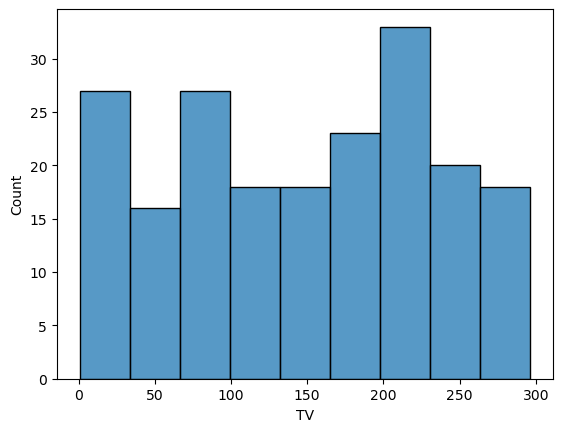

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


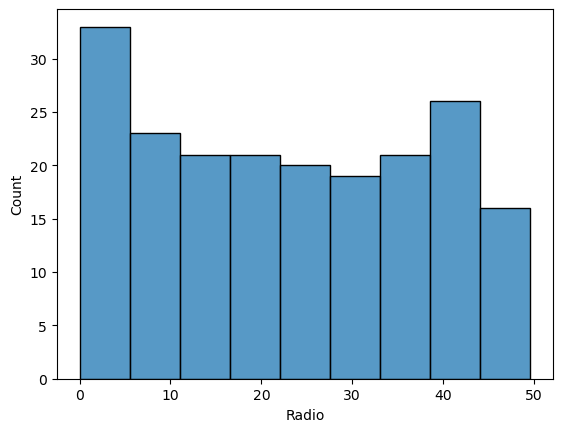

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


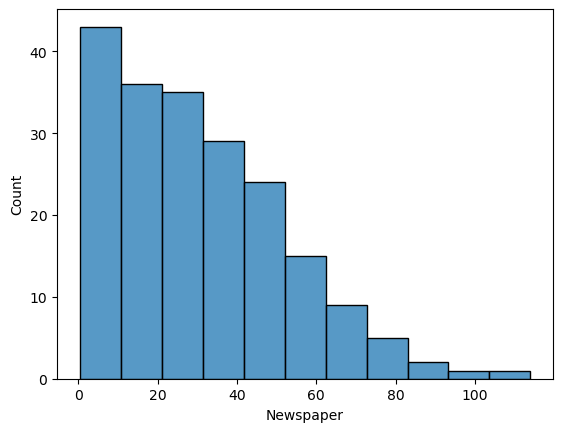

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


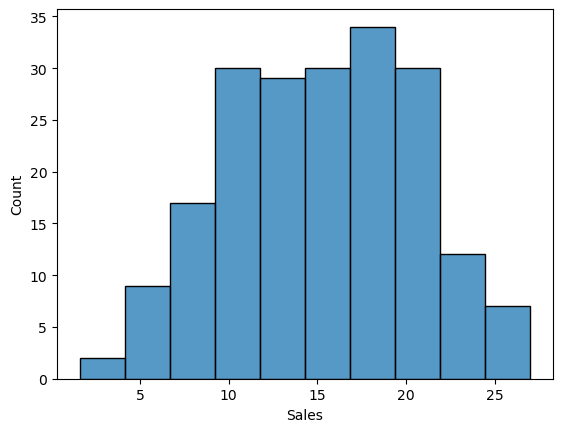

In [7]:
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

In [8]:
hm=data.select_dtypes(include="number").corr()

<Axes: >

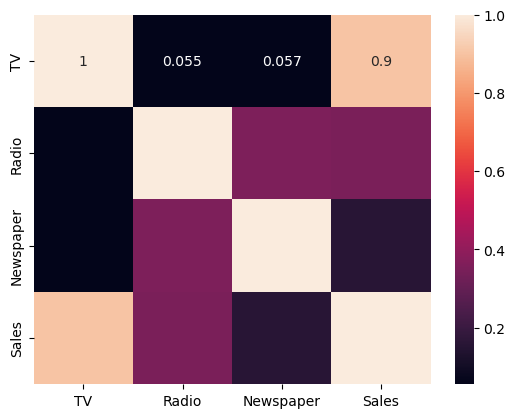

In [9]:
sns.heatmap(hm,annot=True)

In [10]:
x=data['TV']
y=data['Sales']

In [11]:
x=x.values.reshape(-1,1)

In [12]:
y=y.values.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(200, 1) (134, 1) (66, 1)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
classifier=LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [16]:
x_train_pred=classifier.predict(x_train)
x_train_pred

array([[21.52421549],
       [ 8.05272401],
       [ 7.35206515],
       [12.73948416],
       [15.80118677],
       [ 7.63468385],
       [20.71757461],
       [13.41070358],
       [ 9.20086249],
       [ 7.72300219],
       [ 7.59346862],
       [ 9.21263827],
       [16.73736122],
       [23.42011595],
       [20.90009918],
       [22.29552903],
       [16.26633005],
       [16.33109683],
       [20.67047149],
       [20.12878564],
       [20.71757461],
       [15.40081027],
       [23.63796786],
       [13.98182887],
       [19.43990256],
       [ 7.26963469],
       [12.10947997],
       [19.56354824],
       [13.67565861],
       [23.82638033],
       [17.63820833],
       [23.14927302],
       [18.98653506],
       [19.44579045],
       [11.1850813 ],
       [11.30283909],
       [17.46745953],
       [11.02610828],
       [21.35346669],
       [13.70509806],
       [20.55860159],
       [18.29176408],
       [10.57274077],
       [18.21522151],
       [ 8.26468804],
       [14

In [17]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVR

In [18]:
kn=KNeighborsRegressor().fit(x_train,y_train)
kn

KNeighborsRegressor()

In [19]:
kn_train_pred=kn.predict(x_train)
kn_test_pred=kn.predict(x_test)
    

In [29]:
r2_train=r2_score(y_train,kn_train_pred)
r2=r2_score(y_test,kn_test_pred)
rmse=np.sqrt(mean_squared_error(y_test,kn_test_pred))
variance=r2_train-r2
print("***KNeighborsRegressor***")
print("R2:",r2)
print("RMSE:",rmse)

***KNeighborsRegressor***
R2: 0.791966160598307
RMSE: 2.284990551004931


In [30]:
sv=SVR().fit(x_train,y_train)
sv

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [31]:
sv_train_pred=sv.predict(x_train)
sv_test_pred=sv.predict(x_test)

In [32]:
r2_train=r2_score(y_train,sv_train_pred)
r2=r2_score(y_test,sv_test_pred)
rmse=np.sqrt(mean_squared_error(y_test,sv_test_pred))
variance=r2_train-r2
print("***SVR***")
print("R2:",r2)
print("RMSE:",rmse)

***SVR***
R2: 0.8005218206561671
RMSE: 2.237510665753229


In [33]:
rf=RandomForestRegressor().fit(x_train,y_train)
rf

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5656\872798218.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor().fit(x_train,y_train)


RandomForestRegressor()

In [34]:
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)
    

In [27]:
r2_train=r2_score(y_train,rf_train_pred)
r2=r2_score(y_test,rf_test_pred)
rmse=np.sqrt(mean_squared_error(y_test,rf_test_pred))
variance=r2_train-r2
print("***RandomForestRegressor***")
print("R2:",r2)
print("RMSE:",rmse)

***RandomForestRegressor***
R2: 0.7486047552554596
RMSE: 2.51186298165799
